<a href="https://colab.research.google.com/github/UlitiM2/tasks_university/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%2C%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/lab1_Ulitina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функции

##1.1

Постройте график функции и её производной первого порядка. Также найдите точки экстремума функции, отметьте их на графике другим цветом. Вычисления проведите вручную и приложите скрин расчетов.

$f(x) = (x^2-2x)ln(x)-1.5x^2+4x$


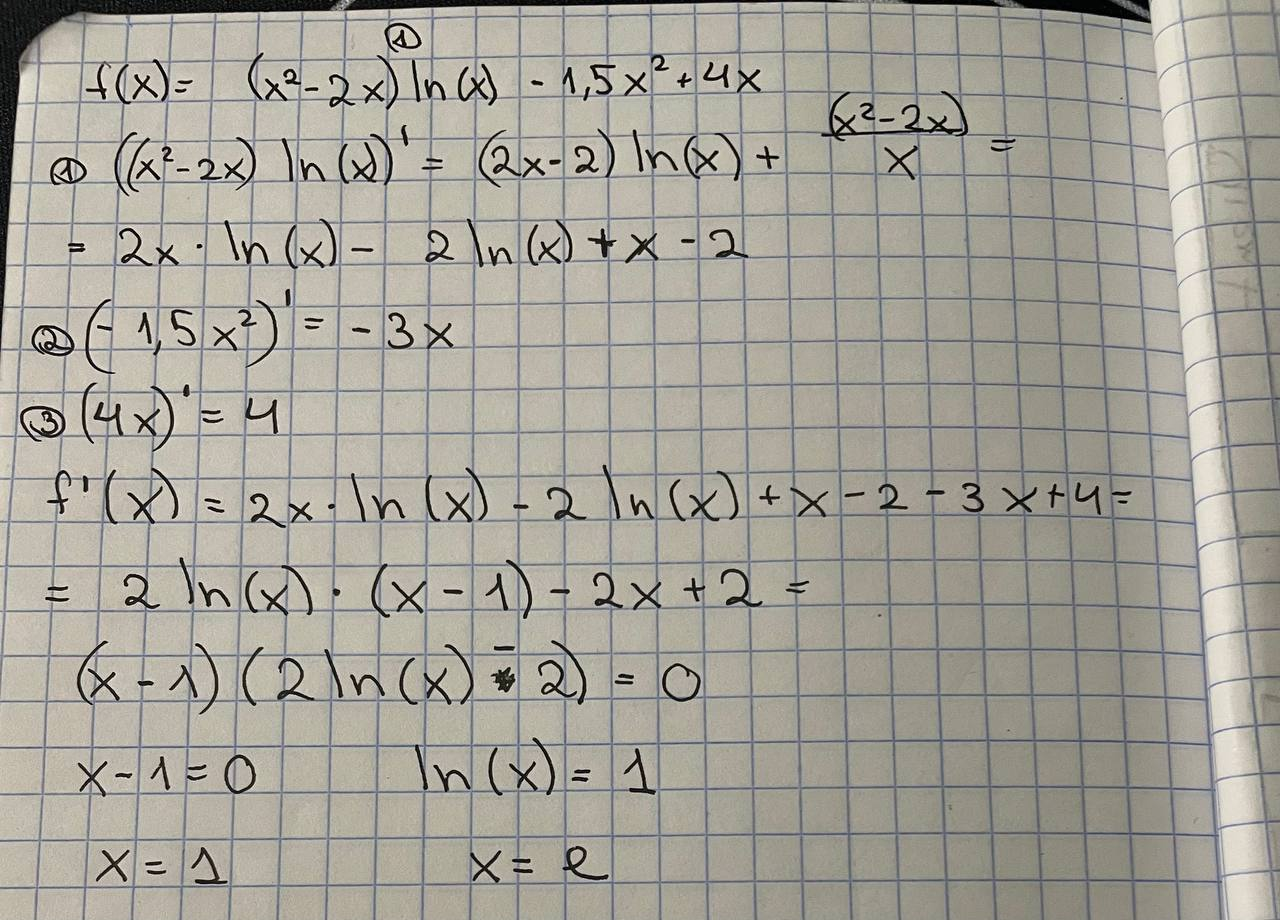

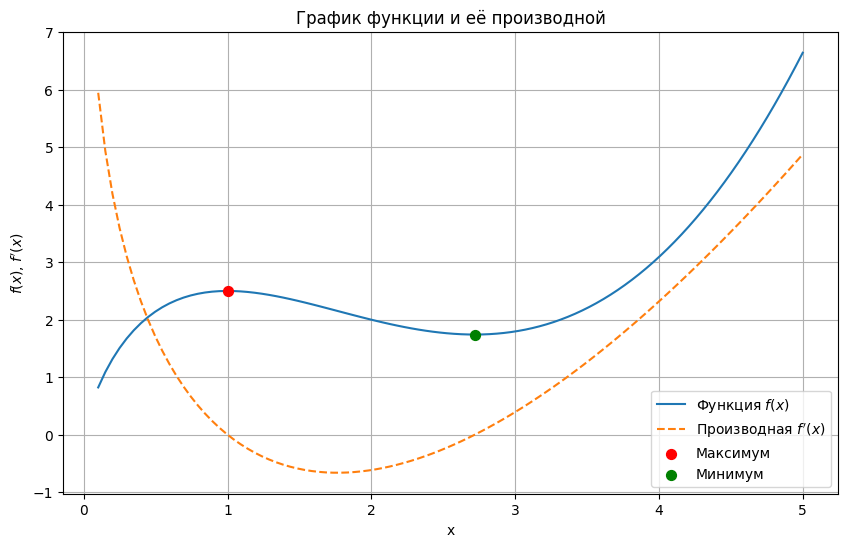

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**2 - 2*x)*np.log(x) - 1.5*x**2 + 4*x

def f_dx(x):
    return (x - 1)*(2*np.log(x) - 2)

x_values = np.linspace(0.1, 5, 100)

plt.figure(figsize=(10,6))
plt.plot(x_values, f(x_values), label='Функция $f(x)$')
plt.plot(x_values, f_dx(x_values), label='Производная $f\'(x)$', linestyle='--')
plt.scatter([1], [f(1)], color='red', s=50, zorder=3, label='Максимум')
plt.scatter([np.e], [f(np.e)], color='green', s=50, zorder=3, label='Минимум')
plt.xlabel('x')
plt.ylabel('$f(x)$, $f\'(x)$')
plt.title('График функции и её производной')
plt.grid(True)
plt.legend()
plt.show()

##1.2

Найдите частные производные функции $f(x, y, z) = 15x^2 + exp(x^2 + y^3)*cos(z)$ с помощью [SymPy](https://www.geeksforgeeks.org/python-sympy-diff-method/)

In [ ]:
import sympy as sp

x, y, z = sp.symbols('x y z')
f = 15 * x**2 + sp.exp(x**2 + y**3) * sp.cos(z)

fx = sp.diff(f, x)
fy = sp.diff(f, y)
fz = sp.diff(f, z)


print("Частная производная по x:\n", fx)
print("\nЧастная производная по y:\n", fy)
print("\nЧастная производная по z:\n", fz)


Частная производная по x:
 2*x*exp(x**2 + y**3)*cos(z) + 30*x

Частная производная по y:
 3*y**2*exp(x**2 + y**3)*cos(z)

Частная производная по z:
 -exp(x**2 + y**3)*sin(z)


##2

Не всегда значения функций возможно рассчитать напрямую, однако их можно вычислить приближенно, используя, например, ряды Тейлора. Реализуйте расчет $e^x$. Сравните значения, получаемые с различной точностью приближения (5, 10, 15), с numpy-реализацией. Постройте график, отобразив на нём все четыре линии.

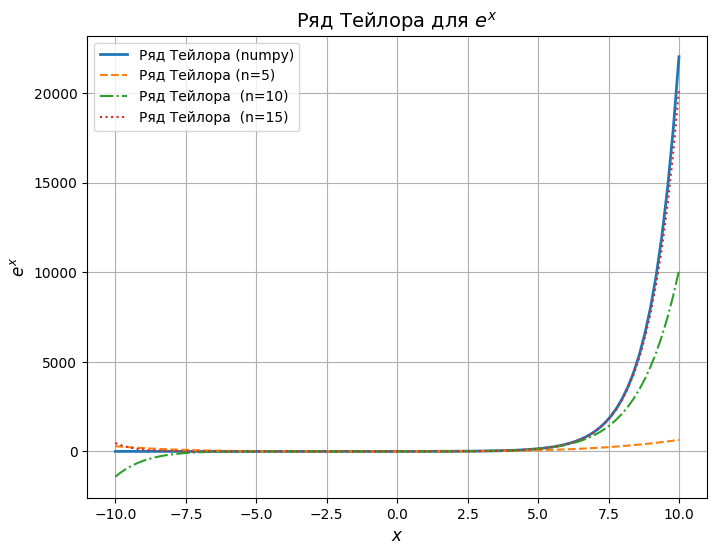

In [ ]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

def taylor_exp(x, n):
    result = 0.0
    for i in range(n):
        result += (x ** i) / factorial(i)
    return result


x_values = np.linspace(-10, 10, 100)

taylor_approx_5 = [taylor_exp(xi, 5) for xi in x_values]
taylor_approx_10 = [taylor_exp(xi, 10) for xi in x_values]
taylor_approx_15 = [taylor_exp(xi, 15) for xi in x_values]

exact_values = np.exp(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, exact_values, label='Ряд Тейлора (numpy)', linewidth=2)
plt.plot(x_values, taylor_approx_5, label='Ряд Тейлора (n=5)', linestyle='dashed')
plt.plot(x_values, taylor_approx_10, label='Ряд Тейлора  (n=10)', linestyle='dashdot')
plt.plot(x_values, taylor_approx_15, label='Ряд Тейлора  (n=15)', linestyle='dotted')

plt.title(r'Ряд Тейлора для $e^x$', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$e^x$', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

##3

Рассмотрите две следующие функции, часто использующиеся как функции потерь (то есть они помогают оценить качество предсказаний модели).

$MAE (Mean\ Absolute\ Error) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \widehat{y}_i|$

$MSE (Mean\ Squared\ Error) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2$

Письменно ответьте на вопросы:

1. Какая проблема присуща MAE с точки зрения дифференцирования?

2. Если в качестве $\widehat{y}_i$ всегда будет предсказываться константное значение, каким оно должно быть, чтобы минимизировать значение каждой из функций?


1) С точки зрения дифференцирования есть проблема, что функция не дифференцируема в точке $y_i$ = $\hat{y}_i$

Из-за этого невозможно использовать градиентный спуск для оптимизации

2)Для MAE - медиана, так как для нас важно расстояние между точками

Для MSE - среднее значение, так как используется квадрат разницы, он сильно растет, если точка далеко от $\hat{y}_i$

# Матрицы. Векторы

##1

Реализуйте следующие паттерны. Не используйте циклы! Все матрицы квадратные со стороной длины n. Примеры приведены для n=5.

1. Шахматная доска
```
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
 ```
2. Полоса шириной 3 относительно главной диагонали
```
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]
 ```
3. Кайма из единиц
```
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
 ```
4. Полосы
```
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
 ```
5. Верхний треугольник
```
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]
 ```


In [ ]:
import numpy as np
n = 5


def chessboard(n):
    matrix = np.zeros((n, n))
    matrix += np.indices((n, n))[0] + np.indices((n, n))[1]
    matrix = matrix % 2
    return matrix
print("------------------")
print(chessboard(n))


def diagonal_stripe(n):
    matrix = np.zeros((n, n))
    matrix += np.abs(np.indices((n, n))[0] - np.indices((n, n))[1]) <= 1
    return matrix
print("------------------")
print(diagonal_stripe(n))

def border_of_ones(n):
    matrix = np.zeros((n, n))
    matrix[0, :] = 1
    matrix[-1, :] = 1
    matrix[:, 0] = 1
    matrix[:, -1] = 1
    return matrix
print("-----------------")
print(border_of_ones(n))

def stripes(n):
    matrix = np.zeros((n, n))
    matrix[1::2, :] = 1
    return matrix
print("------------------")
print(stripes(n))


def upper_triangle(n):
    matrix = np.triu(np.ones((n, n)), 0)
    return matrix
print("------------------")
print(upper_triangle(n))

------------------
[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]
------------------
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]
-----------------
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
------------------
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
------------------
[[1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


##2

Пусть дан вектор следующего вида. Преобразуйте его, чтобы получить две матрицы: первая должна содержать одинаковые значения column-wise (столбец целиком из нулей, столбец целиком из единиц и так далее), а вторая - row-wise. Не используйте циклы.

In [ ]:
n = 5
vector = np.hstack([[i for i in range(n)] for _ in range(n)])  # также существуют vstack и dstack
print(vector)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [ ]:
matrix_column_wise = vector.reshape(n, n).T
print("column-wise \n", matrix_column_wise)

matrix_row_wise = vector.reshape(n, n)
print("row-wise \n", matrix_row_wise)

column-wise 
 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
row-wise 
 [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


# Теория вероятностей

##1

Постройте графики плотности распределений для следующих распределений:

* Биномиальное распределение
* Геометрическое распределение
* Равномерное распределение
* Нормальное распределение
* Логнормальное распределение

Параметры распределений выберите произвольно. Подумайте, какие явления в реальном мире подчиняются тому или иному распределению.

Отобразите также следующие статистические показатели: выборочное среднее, мода, медиана, стандартное отклонение.

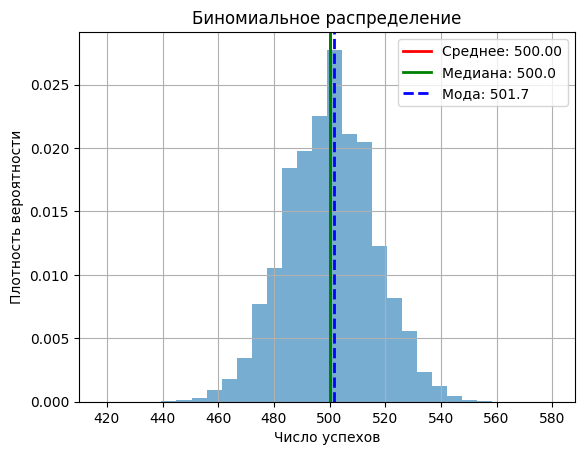

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import scipy.stats as st

probs = np.random.binomial(1000, 0.5, 10000000)

mean = np.mean(probs)
median = np.median(probs)
std_dev = np.std(probs)
counts, bin_edges = np.histogram(probs, bins=30)
mode_bin = bin_edges[np.argmax(counts)]
mode = mode_bin + (bin_edges[1] - bin_edges[0]) / 2

plt.hist(probs, bins=30, density=True, histtype='stepfilled', alpha=0.6)
plt.axvline(mean, color='r', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='g', linewidth=2, label=f'Медиана: {median}')
plt.axvline(mode, color='b', linestyle='dashed', linewidth=2, label=f'Мода: {mode}')


plt.legend()
plt.title(f'Биномиальное распределение')
plt.xlabel('Число успехов')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

Выборочное среднее: 98.65
Медиана: 67.5
Стандартное отклонение: 100.86
Мода: 12.316666666666666


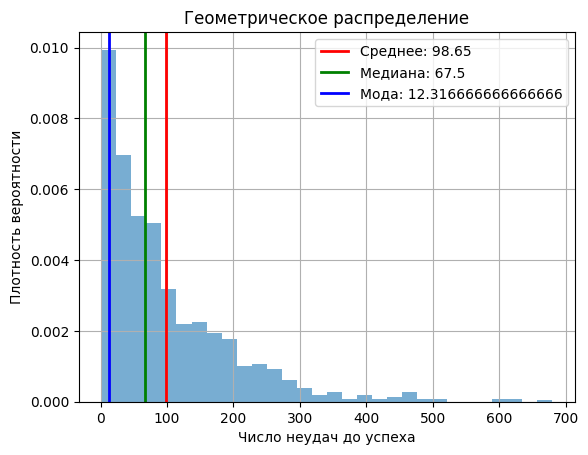

In [ ]:
probs = np.random.geometric(0.01, 1000)

mean = np.mean(probs)
median = np.median(probs)
std_dev = np.std(probs)
counts, bin_edges = np.histogram(probs, bins=30)
mode_bin = bin_edges[np.argmax(counts)]
mode = mode_bin + (bin_edges[1] - bin_edges[0]) / 2

print(f"Выборочное среднее: {mean:.2f}")
print(f"Медиана: {median}")
print(f"Стандартное отклонение: {std_dev:.2f}")
print(f"Мода: {mode}")


plt.hist(probs, bins=30, density=True, histtype='stepfilled', alpha=0.6)
plt.axvline(mean, color='r', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='g', linewidth=2, label=f'Медиана: {median}')
plt.axvline(mode, color='b', linewidth=2, label=f'Мода: {mode}')


plt.legend()
plt.title(f'Геометрическое распределение')
plt.xlabel('Число неудач до успеха')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

Выборочное среднее: 76.29
Медиана: 74.20076086265881
Стандартное отклонение: 42.28
Мода: 118.58643938853994


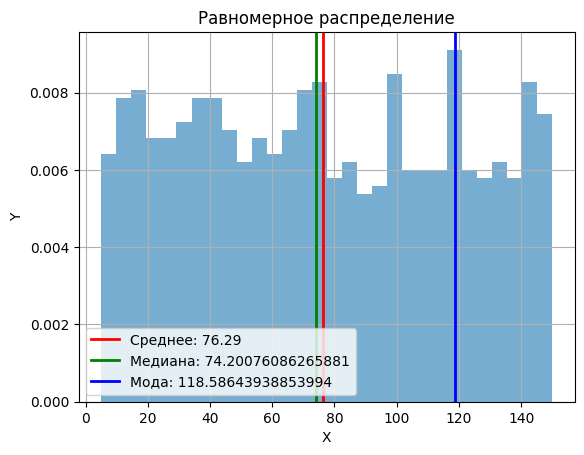

In [ ]:
probs = np.random.uniform(5,150,1000)

mean = np.mean(probs)
median = np.median(probs)
std_dev = np.std(probs)
counts, bin_edges = np.histogram(probs, bins=30)
mode_bin = bin_edges[np.argmax(counts)]
mode = mode_bin + (bin_edges[1] - bin_edges[0]) / 2

print(f"Выборочное среднее: {mean:.2f}")
print(f"Медиана: {median}")
print(f"Стандартное отклонение: {std_dev:.2f}")
print(f"Мода: {mode}")


plt.hist(probs, bins=30, density=True, histtype='stepfilled', alpha=0.6)
plt.axvline(mean, color='r', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='g', linewidth=2, label=f'Медиана: {median}')
plt.axvline(mode, color='b',  linewidth=2, label=f'Мода: {mode}')


plt.legend()
plt.title(f'Равномерное распределение')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Выборочное среднее: 5.01
Медиана: 5.007475699219598
Стандартное отклонение: 0.51
Мода: 5.234511974956995


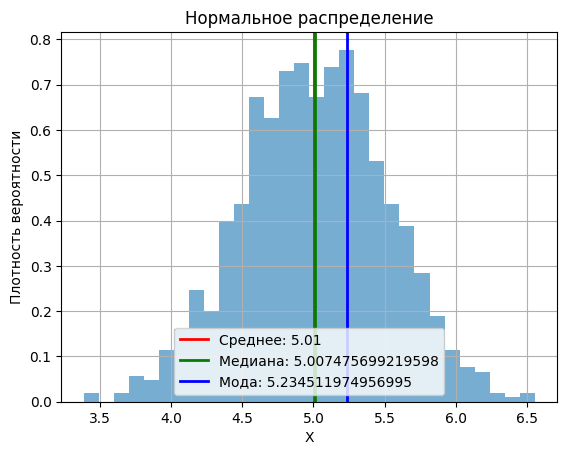

In [ ]:
probs = np.random.normal(5, 0.5, 1000)

mean = np.mean(probs)
median = np.median(probs)
std_dev = np.std(probs)
counts, bin_edges = np.histogram(probs, bins=30)
mode_bin = bin_edges[np.argmax(counts)]
mode = mode_bin + (bin_edges[1] - bin_edges[0]) / 2

print(f"Выборочное среднее: {mean:.2f}")
print(f"Медиана: {median}")
print(f"Стандартное отклонение: {std_dev:.2f}")
print(f"Мода: {mode}")


plt.hist(probs, bins=30, density=True, histtype='stepfilled', alpha=0.6)
plt.axvline(mean, color='r', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='g', linewidth=2, label=f'Медиана: {median}')
plt.axvline(mode, color='b',  linewidth=2, label=f'Мода: {mode}')


plt.legend()
plt.title(f'Нормальное распределение')
plt.xlabel('X')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()


Выборочное среднее: 25422.16
Медиана: 22984.878576285497
Стандартное отклонение: 13099.52
Мода: 16788.073293180467


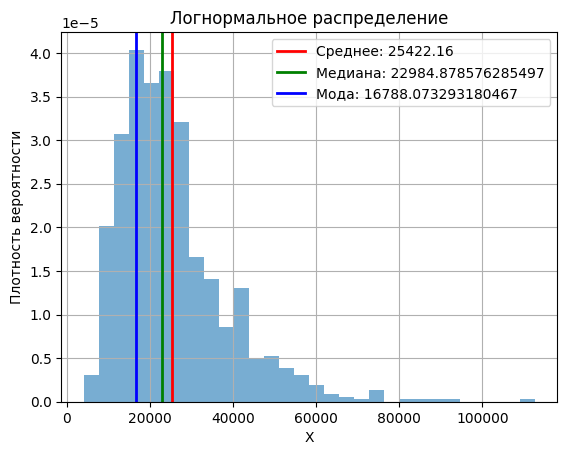

In [ ]:
probs = np.random.lognormal(10, 0.5, 1000)

mean = np.mean(probs)
median = np.median(probs)
std_dev = np.std(probs)
counts, bin_edges = np.histogram(probs, bins=30)
mode_bin = bin_edges[np.argmax(counts)]
mode = mode_bin + (bin_edges[1] - bin_edges[0]) / 2

print(f"Выборочное среднее: {mean:.2f}")
print(f"Медиана: {median}")
print(f"Стандартное отклонение: {std_dev:.2f}")
print(f"Мода: {mode}")


plt.hist(probs, bins=30, density=True, histtype='stepfilled', alpha=0.6)
plt.axvline(mean, color='r', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='g', linewidth=2, label=f'Медиана: {median}')
plt.axvline(mode, color='b',  linewidth=2, label=f'Мода: {mode}')


plt.legend()
plt.title(f'Логнормальное распределение')
plt.xlabel('X')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()



Подумайте, в каких случаях медиана предпочтительнее среднего при расчете "средней температуры по больнице". Какие модификации можно было бы произвести для формулы среднего или для выборки, чтобы среднее значение стало более репрезентативно в подобных случаях? Напишите ответ.

Медиана предпочтительнее среднего при наличии выбросов, так как она менее чувствительна к ним(определяется положением середины выборки, а не суммой значений)



Модификации для формулы среднего:

1)удаление выбросов

2)взять точки близкие к медиане

##2 (2 балла)

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

 Рассчитайте вероятности, а также смоделируйте ситуацию и оцените эмпирическое распределение.

In [ ]:
import math
k_series = 10
k_series_1 = 8
n_people = 1000
theoretical_probability = 1 - (1 - 2 * (1/2)**k_series)**n_people
print(f'Теоретическая вероятность того, что хотя бы у одного человека монетка выпала {k_series} раз подряд одной стороной: {theoretical_probability:.6f}')

theoretical_probability_1 = 1 - (1-(1-(1 - (1/2)**k_series_1)**3))**n_people
print(f'Теоретическая вероятность того, что хотя бы у одного человека монетка выпала {k_series_1} раз подряд одной стороной: {theoretical_probability_1:.6f}')

p1 = (0.5)**10*2
binom_dist = math.comb(1000, 3)*p1**3 * (1-p1)**(1000-3)
print(f'Вероятность того, что ровно у трех человек из 1000 монетка выпала {k_series} раз подряд одной стороной: {binom_dist:.6f}')

Теоретическая вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд одной стороной: 0.858440
Теоретическая вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд одной стороной: 0.999992
Вероятность того, что ровно у трех человек из 1000 монетка выпала 10 раз подряд одной стороной: 0.176287


In [ ]:
import numpy as np

n_people = 1000
n_flips = 10
n_simulations = 1000

def has_k_consecutive(flips, k):
    for i in range(len(flips) - k + 1):
        if len(set(flips[i:i+k])) == 1:
            return True
    return False

results_10 = []
results_8 = []
results_exactly_3 = []

for _ in range(n_simulations):
    flips = np.random.randint(2, size=(n_people, n_flips))
    count_10 = sum(has_k_consecutive(person, 10) for person in flips)
    count_8 = sum(has_k_consecutive(person, 8) for person in flips)
    results_10.append(count_10 > 0)
    results_8.append(count_8 > 0)
    results_exactly_3.append(count_10 == 3)

prob_at_least_one_10 = np.mean(results_10)
prob_at_least_one_8 = np.mean(results_8)
prob_exactly_3 = np.mean(results_exactly_3)

print(f"Вероятность хотя бы одного 10 подряд: {prob_at_least_one_10:.4f}")
print(f"Вероятность хотя бы одного 8 подряд: {prob_at_least_one_8:.4f}")
print(f"Вероятность ровно троих с 10 подряд: {prob_exactly_3:.4f}")

Вероятность хотя бы одного 10 подряд: 0.8380
Вероятность хотя бы одного 8 подряд: 1.0000
Вероятность ровно троих с 10 подряд: 0.1750


##3 (2 балла)

В магазин поступила новая продукция с трех предприятий. Процентный состав этой продукции следующий: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта. Если известно, что купленная продукция высшего сорта, какова вероятность, что она была куплена на втором предприятии?

Решите задачу в общем случае для N предприятий, где доля продукции каждого составляет $a_i$, а доля продукции высшего сорта на каждом составляет $b_i$. Напишите функцию, принимающую на вход два списка: a и b, а также n - номер предприятия, для которого необходимо узнать вероятность, что продукция высшего сорта была куплена именно на нём (нумерация с единицы). Функция должна возвращать две вероятности.

In [ ]:
import numpy as np

def calculate_probabilities(a, b, n):
    a = np.array(a)
    b = np.array(b)
    total_high_grade_prob = np.sum(a * b)

    conditional_prob = (a[n - 1] * b[n - 1]) / total_high_grade_prob

    return total_high_grade_prob, conditional_prob

a = [0.2, 0.3, 0.5]
b = [0.1, 0.05, 0.2]
n = 2

total_prob, cond_prob = calculate_probabilities(a, b, n)
print("Общая вероятность выбора продукции высшего сорта:", total_prob)
print(f"Условная вероятность выбора продукции высшего сорта с предприятия {n}:", cond_prob)


Общая вероятность выбора продукции высшего сорта: 0.135
Условная вероятность выбора продукции высшего сорта с предприятия 2: 0.1111111111111111


# Методы оптимизации (3 балла)



(Задание взято у Яндекса)

Дана функция $f(x) = (a\sin(x) + b\ln(x))^2 + cx^2$ и файл, содержащий пары (x, f(x)). Необходимо с точностью до трёх знаков после запятой подобрать коэффициенты a, b, c исходной функции. Для решения задачи предлагается использовать градиентный спуск и функцию потерь MSE.

P.S. на предоставленном наборе данных возможно получить MSE < 0.00001, ориентируйтесь на эту цифру.

In [ ]:
!gdown 1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3

Downloading...
From: https://drive.google.com/uc?id=1P5REbDVMtoHk_EPOaXzFWym2sMKhhbg3
To: /content/data.txt
100% 27.0k/27.0k [00:00<00:00, 64.5MB/s]


In [ ]:
import numpy as np

def gradient_descent(x, y, learning_rate=0.001, max_iter=10000):
    a, b, c = 1.0, 2.0, 0.0
    N = len(x)
    for i in range(max_iter):
        f_x = (a * np.sin(x) + b * np.log(x))**2 + c * x**2

        error = f_x - y
        mse = np.mean(error**2)

        if mse < 0.00001:
            print(f"Оптимизация завершена на итерации {i} с MSE = {mse:.6f}")
            break

        grad_a = (2 / N) * np.sum(error * 2 * (a * np.sin(x) + b * np.log(x)) * np.sin(x))
        grad_b = (2 / N) * np.sum(error * 2 * (a * np.sin(x) + b * np.log(x)) * np.log(x))
        grad_c = (2 / N) * np.sum(error * x**2)

        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

    return a, b, c



with open('data.txt', 'r') as file:
    x_data = []
    y_data = []
    for para in eval(file.read()):
        x_data.append(para[0])
        y_data.append(para[1])
x_data = np.array(x_data)
y_data = np.array(y_data)

a, b, c = gradient_descent(x_data, y_data)

print(f"Коэффициенты: a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")


Оптимизация завершена на итерации 205 с MSE = 0.000010
Коэффициенты: a = 3.141, b = 2.718, c = 4.000
